In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Assuming 'data' is your DataFrame and it already includes 'Pass' as a binary indicator (0 = fail, 1 = pass)
# and 'sums_1' as the scores for the first subject.
# Load your data
data = pd.read_excel('C:/Users/Prachi/Documents/Data Science Masters/Thesis/student_score_per_topic_with_total.xlsx')

# Convert all score columns to numeric (assuming score columns are named 'Score1', 'Score2', ...)
score_columns = [col for col in data.columns if 'sums' in col]
data[score_columns] = data[score_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean (or zero, or median)
data[score_columns] = data[score_columns].fillna(data[score_columns].mean())

# Create a binary 'Pass' column based on the passing percentage, e.g., 40%
passing_score = 34
data['Pass'] = (data['total'] >= passing_score).astype(int)


total_percentage    1.000000
total               1.000000
sums_5              0.859524
Pass                0.847037
sums_4              0.830061
sums_2              0.825071
sums_7              0.818671
sums_6              0.799224
sums_3              0.665141
sums_1              0.552667
Name: total, dtype: float64


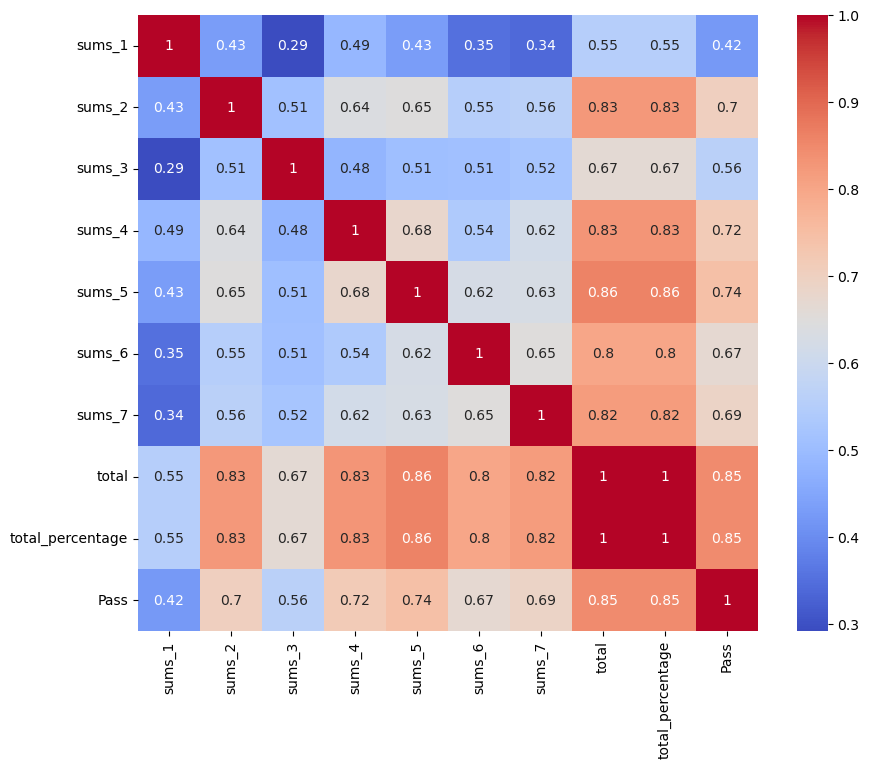

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()
print(correlation_matrix['total'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [4]:

# Assuming 'subscore' is the predictor and 'final_score' is the outcome
X = data[score_columns]  # Predictor
y = data['total']  # Target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.00
R^2 Score: 1.00


ValueError: x and y must be the same size

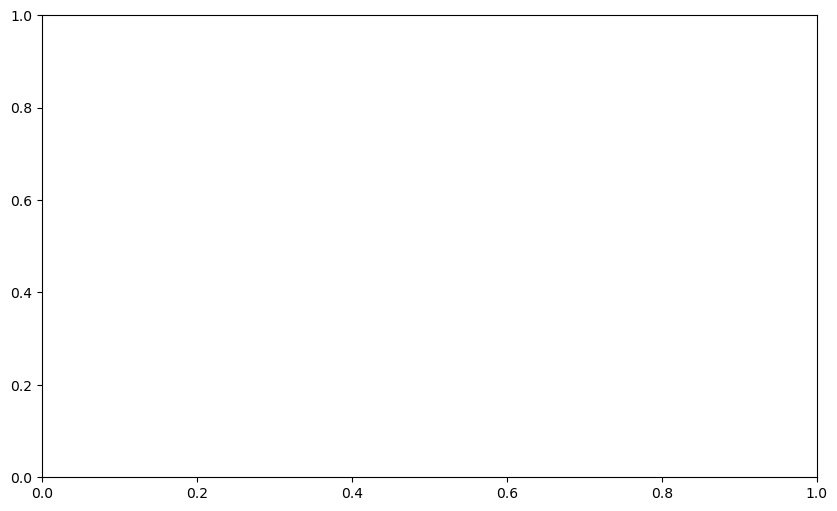

In [9]:
import matplotlib.pyplot as plt

# Plotting real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Subscore vs. Final Score')
plt.xlabel('Subscore')
plt.ylabel('Final Score')
plt.legend()
plt.show()
